# User Portrait for New Insurance Product

## Read Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

In [2]:
df = pd.read_csv("ma_resp_data_temp.csv")
df.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


In [3]:
feature_dict = pd.read_excel("保险案例数据字典.xlsx")

## Data Exploration

In [4]:
dic={k:v for k,v in feature_dict[["变量名","变量说明"]].values.reshape(-1,2)}

def chinese(x):
    y=x.copy()
    y.columns=pd.Series(y.columns).map(dic)
    return y

### Finding Unmatched Feature Names between Two Dataframes

In [5]:
np.setxor1d(df.columns,feature_dict.变量名)

array(['N1819', 'N2029', 'N2N29', 'N3039', 'N3N39', 'N4049', 'N4N49',
       'N5059', 'N5N59', 'N6064', 'N6N64', 'NY8Y9', 'meda'], dtype=object)

In [6]:
#除了字段‘meda’，其余字段可以一一对应
df['meda'].nunique()
#非重复数据较少，则可以删除此字段

75

In [7]:
lista = ['N2N29', 'N3N39', 'N4N49', 'N5N59','N6N64', 'NY8Y9']
listb = ['N2029', 'N3039', 'N4049', 'N5059','N6064', 'N1819']

#要替换的列标签，如何替换，做成映射字典
dic = dict(zip(lista,listb))
dic

#封装相对应的字段名，便于后面替换

{'N2N29': 'N2029',
 'N3N39': 'N3039',
 'N4N49': 'N4049',
 'N5N59': 'N5059',
 'N6N64': 'N6064',
 'NY8Y9': 'N1819'}

### Define Function to Match Feature Names

In [8]:
def tran(x):
    if x in dic:
        i = dic[x]
        return i
    else:
        return x

tran_new = np.vectorize(tran)

df.columns = tran_new(df.columns)

#自定义函数替换非相同字段，向量化转化后使用

In [9]:
np.setxor1d(df.columns,feature_dict.变量名)

array(['meda'], dtype=object)

In [10]:
df['N1819']

0        N
1        N
2        N
3        N
4        N
        ..
43661    N
43662    N
43663    N
43664    N
43665    N
Name: N1819, Length: 43666, dtype: object

In [11]:
# delete extra feature in feature_dict
removal = df.pop('meda')

In [12]:
feature_dict["变量名"][:5].tolist()

['KBM_INDV_ID', 'resp_flag', 'age', 'GEND', 'c210mys']

In [13]:
df[feature_dict["变量名"][:5].tolist()].head()

,KBM_INDV_ID,resp_flag,age,GEND,c210mys
0,281478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


### Define Function to Explore Important Info. within Dataframe

In [14]:
# 输出与数据清洗关键的信息
def fre(x):
    for i in x.columns:
        print("字段名:",i)
        print('---------')
        print("字段数据类型:",x[i].dtype)
        print('---------------------------')
        print(x[i].value_counts())
        print('---------------------------')
        print("缺失值个数:",x[i].isnull().sum())
        print('----------------------------------------------------------------\n\n')

In [15]:
dic={k:v for k,v in feature_dict[["变量名","变量说明"]].values.reshape(-1,2)}

def chinese(x):
    y=x.copy()
    y.columns=pd.Series(y.columns).map(dic)
    return y

### Exploration Based on Info. Extracted

#### Feature 1-5

In [16]:
data0=chinese(df[feature_dict["变量名"][:5].tolist()])
data0.head()

,Individual ID,是否response,年龄,性别,学历
0,281478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


In [17]:
fre(data0)

字段名: Individual ID
---------
字段数据类型: int64
---------------------------
142936063    1
68797618     1
193209817    1
172309160    1
171816124    1
            ..
172641155    1
76214763     1
228943803    1
185032198    1
1966080      1
Name: Individual ID, Length: 43666, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否response
---------
字段数据类型: int64
---------------------------
0    26177
1    17489
Name: 是否response, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 年龄
---------
字段数据类型: float64
---------------------------
66.0     3967
67.0     3670
65.0     3475
69.0     3449
68.0     3423
70.0     2948
71.0     2943
72.0     2909
74.0     2817
73.0     2814
75.0     2448
76.0     2220
78.0     2038
77.0     2012
79.0     1823
80.0      691
91.0        2
86.0        2
88.0        2
96.0        1
99.0        1
82.0        1
95.0        1
90

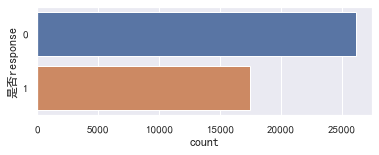

In [18]:
sns.set(font='SimHei')

# 查看性别比例
plt.figure(1 , figsize = (6 , 2))
sns.countplot(y = '是否response' , data = data0)
plt.show();

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


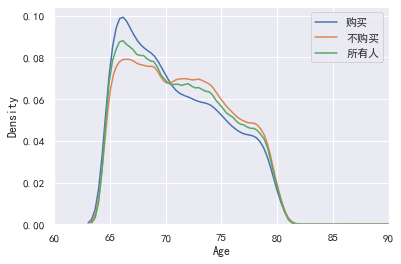

In [19]:
# 为连续型变量：年龄创建密度图 
# plt.subplot(1, 2, 2)
sns.kdeplot(data0.年龄[data0.是否response==1], label='购买')
sns.kdeplot(data0.年龄[data0.是否response==0], label='不购买')
sns.kdeplot(data0.年龄.dropna(), label='所有人')

plt.xlim(([60,90]))
plt.xlabel('Age')
plt.ylabel('Density');

#### Feature 6-23

In [20]:
data1 = chinese(df[feature_dict['变量名'][5:23].tolist()])
data1.head()

,是否有小孩,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,家庭小孩个数,家庭成年人个数,家庭成员人数量,是否有家庭成员小于18岁,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,家里是否有老人
0,Y,4,0,5,1,1,5,3,8,N,N,N,Y,N,N,Y,Y,Y
1,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
2,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
3,Y,0,4,0,0,0,1,4,5,N,N,N,N,Y,Y,N,Y,Y
4,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N


In [21]:
fre(data1)

字段名: 是否有小孩
---------
字段数据类型: object
---------------------------
U    24500
Y    10225
P     8941
Name: 是否有小孩, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 小孩是否在0-2岁之间
---------
字段数据类型: int64
---------------------------
0    40677
4     2856
1       57
2       48
3       16
6        9
5        3
Name: 小孩是否在0-2岁之间, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 小孩是否在3-5岁之间
---------
字段数据类型: int64
---------------------------
0    41087
4     2068
1      204
2      202
3       45
5       30
6       29
7        1
Name: 小孩是否在3-5岁之间, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 小孩是否在6-10岁之间
---------
字段数据类型: int64
---------------------------
0    38969
4     2960
1      553
2      528
6      240
5      209
3      176
7       31
Name: 小孩是否在6-10岁之间, dtype: int64
-------

In [22]:
data1.isnull().sum()

是否有小孩               0
小孩是否在0-2岁之间         0
小孩是否在3-5岁之间         0
小孩是否在6-10岁之间        0
小孩是否在11-15岁之间       0
小孩是否在16-18岁之间       0
家庭小孩个数              0
家庭成年人个数             0
家庭成员人数量             0
是否有家庭成员小于18岁        0
是否有家庭成员在18-19岁之间    9
是否有家庭成员在20-29岁之间    0
是否有家庭成员在30-39岁之间    0
是否有家庭成员在40-49岁之间    0
是否有家庭成员在50-59岁之间    0
是否有家庭成员在60-64岁之间    0
是否有家庭成员在65岁以上       0
家里是否有老人             8
dtype: int64

#### Feature 24-35

In [23]:
data2 = chinese(df[feature_dict['变量名'][23:35].tolist()])
data2

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
0,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
43661,N,N,N,N,N,N,N,N,N,N,N,N
43662,N,N,N,N,N,N,N,N,N,N,N,N
43663,N,N,N,N,N,N,N,N,N,N,N,N
43664,N,N,N,N,N,N,N,N,N,N,N,N


In [24]:
fre(data2)

字段名: 是否有关节炎
---------
字段数据类型: object
---------------------------
N    38369
Y     5297
Name: 是否有关节炎, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有糖尿病
---------
字段数据类型: object
---------------------------
N    40554
Y     3112
Name: 是否有糖尿病, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有抑郁症
---------
字段数据类型: object
---------------------------
N    41674
Y     1992
Name: 是否有抑郁症, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有高血压
---------
字段数据类型: object
---------------------------
N    38102
Y     5564
Name: 是否有高血压, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 胆固醇含量是否过高
---------
字段数据类型: object
---------------------------
N    37395
Y     6271
Name: 胆固醇含量是否过高, dtype: int64
--------

In [25]:
data2.isnull().sum()

是否有关节炎        0
是否有糖尿病        0
是否有抑郁症        0
是否有高血压        0
胆固醇含量是否过高     0
是否有呼吸疾病       0
是否有心脏病        0
是否有过敏性鼻炎     10
是否有消化不良       0
是否耳聋          0
是否有皮肤病        8
是否视力不好        0
dtype: int64

In [26]:
def zero_one(x):
    for i in x.columns:
        if x[i].dtype=='object':
            dic=dict(zip(list(x[i].value_counts().index),range(x[i].nunique())))
            x[i]=x[i].map(dic)
    return x 

In [27]:
zero_one(data2).head()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
0,0,0,0,0,0,0,0,0.0,0,0,0.0,0
1,0,0,0,0,0,0,0,0.0,0,0,0.0,0
2,0,0,0,0,0,0,0,0.0,0,0,0.0,0
3,0,0,0,0,0,0,0,0.0,0,0,0.0,0
4,0,0,0,0,0,0,0,0.0,0,0,0.0,0


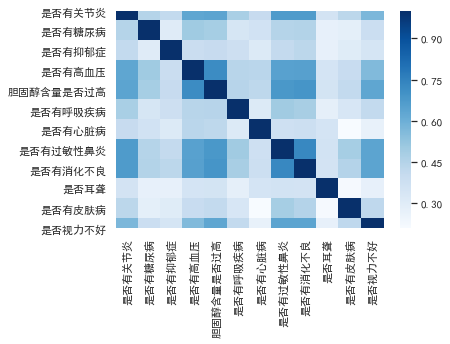

In [28]:
sns.set(font='SimHei')

sns.heatmap(data2.corr(),cmap='Blues')

In [29]:
data_cor = (data2.corr()>0.7)
a = []
data_cor

for i in data_cor.columns:
    if data_cor[i].sum()>1:
        a.append(i)

a

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
是否有关节炎,True,False,False,False,False,False,False,False,False,False,False,False
是否有糖尿病,False,True,False,False,False,False,False,False,False,False,False,False
是否有抑郁症,False,False,True,False,False,False,False,False,False,False,False,False
是否有高血压,False,False,False,True,True,False,False,False,False,False,False,False
胆固醇含量是否过高,False,False,False,True,True,False,False,False,False,False,False,False
是否有呼吸疾病,False,False,False,False,False,True,False,False,False,False,False,False
是否有心脏病,False,False,False,False,False,False,True,False,False,False,False,False
是否有过敏性鼻炎,False,False,False,False,False,False,False,True,True,False,False,False
是否有消化不良,False,False,False,False,False,False,False,True,True,False,False,False
是否耳聋,False,False,False,False,False,False,False,False,False,True,False,False


['是否有高血压', '胆固醇含量是否过高', '是否有过敏性鼻炎', '是否有消化不良']

In [30]:
data2.head()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
0,0,0,0,0,0,0,0,0.0,0,0,0.0,0
1,0,0,0,0,0,0,0,0.0,0,0,0.0,0
2,0,0,0,0,0,0,0,0.0,0,0,0.0,0
3,0,0,0,0,0,0,0,0.0,0,0,0.0,0
4,0,0,0,0,0,0,0,0.0,0,0,0.0,0


#### Feature 36-41

In [31]:
data3 = chinese(df[feature_dict['变量名'][35:41].tolist()])
data3.head()
fre(data3)

,是否有过破产记录,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否有投资
0,N,N,N,N,N,N
1,N,N,N,N,N,N
2,N,N,N,N,N,N
3,Y,N,N,N,N,N
4,N,Y,N,N,N,N


字段名: 是否有过破产记录
---------
字段数据类型: object
---------------------------
N    40599
Y     3067
Name: 是否有过破产记录, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否大学毕业
---------
字段数据类型: object
---------------------------
N    39236
Y     4422
Name: 是否大学毕业, dtype: int64
---------------------------
缺失值个数: 8
----------------------------------------------------------------


字段名: 是否用过保险服务
---------
字段数据类型: object
---------------------------
N    42793
Y      873
Name: 是否用过保险服务, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否投资过寿险
---------
字段数据类型: object
---------------------------
N    35871
Y     7795
Name: 是否投资过寿险, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否购买过医疗险
---------
字段数据类型: object
---------------------------
N    40016
Y     3650
Name: 是否购买过医疗险, dtype: int64


In [32]:
data3.isnull().sum()

是否有过破产记录    0
是否大学毕业      8
是否用过保险服务    0
是否投资过寿险     0
是否购买过医疗险    0
是否有投资       0
dtype: int64

,是否有过破产记录,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否有投资
0,0,0.0,0,0,0,0
1,0,0.0,0,0,0,0
2,0,0.0,0,0,0,0
3,1,0.0,0,0,0,0
4,0,1.0,0,0,0,0


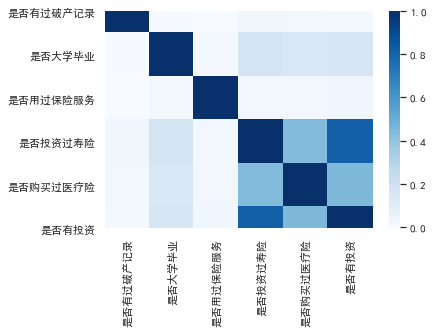

In [33]:
zero_one(data3).head()

sns.set(font='SimHei')

sns.heatmap(data3.corr(),cmap='Blues')

In [34]:
data_cor1 = (data3.corr()>0.65)
b = []
data_cor1

for i in data_cor1.columns:
    if data_cor1[i].sum()>1:
        b.append(i)

b

,是否有过破产记录,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否有投资
是否有过破产记录,True,False,False,False,False,False
是否大学毕业,False,True,False,False,False,False
是否用过保险服务,False,False,True,False,False,False
是否投资过寿险,False,False,False,True,False,True
是否购买过医疗险,False,False,False,False,True,False
是否有投资,False,False,False,True,False,True


['是否投资过寿险', '是否有投资']

#### Feature 42-51

In [35]:
data4 = chinese(df[feature_dict['变量名'][41:51].tolist()])
data4.head()
fre(data4)
data4.isnull().sum()

,是否网上购买过产品,是否通过快递买过东西,所处的县的大小,是否上网,是否喜欢美术,是否经常有奢侈消费,是否经常户外活动,是否喜欢运动,是否热爱科技,幸福指数
0,N,S,A,Y,N,N,N,N,N,1.0
1,N,P,A,N,N,N,N,N,N,4.0
2,N,M,A,Y,N,N,N,N,N,3.0
3,N,S,B,Y,N,N,N,N,N,1.0
4,Y,M,B,Y,Y,Y,N,Y,Y,3.0


字段名: 是否网上购买过产品
---------
字段数据类型: object
---------------------------
N    36197
Y     7469
Name: 是否网上购买过产品, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否通过快递买过东西
---------
字段数据类型: object
---------------------------
M    27450
S     9947
U     3912
P     2350
Name: 是否通过快递买过东西, dtype: int64
---------------------------
缺失值个数: 7
----------------------------------------------------------------


字段名: 所处的县的大小
---------
字段数据类型: object
---------------------------
A    26539
B    12687
C     3823
D      607
Name: 所处的县的大小, dtype: int64
---------------------------
缺失值个数: 10
----------------------------------------------------------------


字段名: 是否上网
---------
字段数据类型: object
---------------------------
Y    28473
N    15193
Name: 是否上网, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否喜欢美术
---------
字段数据类型: object
---------------------------
N    3

是否网上购买过产品      0
是否通过快递买过东西     7
所处的县的大小       10
是否上网           0
是否喜欢美术         0
是否经常有奢侈消费      0
是否经常户外活动       0
是否喜欢运动         0
是否热爱科技         0
幸福指数           5
dtype: int64

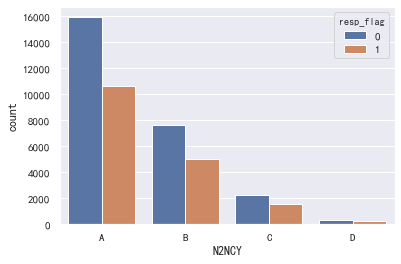

In [36]:
sns.countplot(x='N2NCY', hue='resp_flag', data=df)

['是否经常有奢侈消费', '是否喜欢运动', '是否热爱科技']

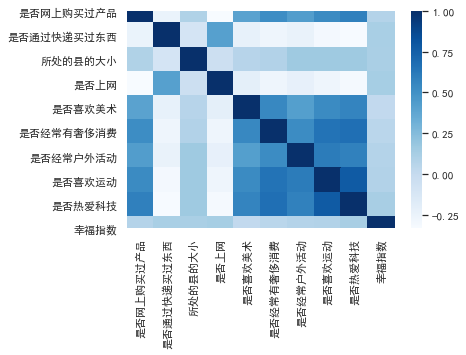

In [37]:
sns.heatmap(zero_one(data4).corr(),cmap='Blues')

data_cor2 = (data4.corr()>0.65)
c=[]

for i in data_cor2.columns:
    if data_cor2[i].sum()>1:
        c.append(i)

c

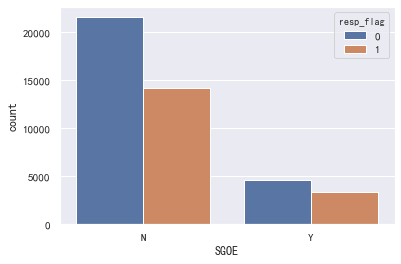

In [38]:
sns.countplot(x='SGOE', hue='resp_flag', data=df)


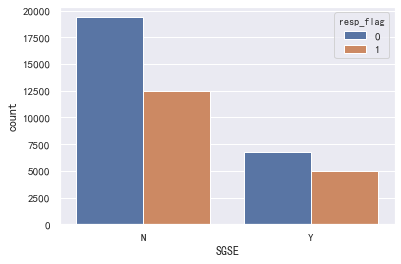

In [39]:
sns.countplot(x='SGSE', hue='resp_flag', data=df)

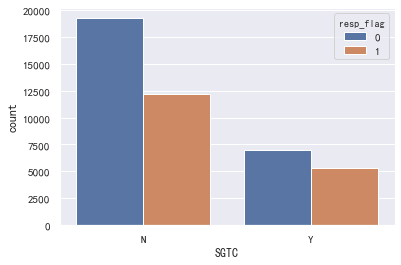

In [40]:
sns.countplot(x='SGTC', hue='resp_flag', data=df)

#### Feature 52-59

In [41]:
data5 = chinese(df[feature_dict['变量名'][51:59].tolist()])
fre(data5)
data5.isnull().sum()

字段名: 是否有房子
---------
字段数据类型: object
---------------------------
Y    31478
U     4747
P     4604
R     2623
T      204
Name: 是否有房子, dtype: int64
---------------------------
缺失值个数: 10
----------------------------------------------------------------


字段名: 是否有医保补贴
---------
字段数据类型: object
---------------------------
U    21612
C     8972
A     6765
B     6306
Name: 是否有医保补贴, dtype: int64
---------------------------
缺失值个数: 11
----------------------------------------------------------------


字段名: 收入所处排名
---------
字段数据类型: float64
---------------------------
79.0    713
61.0    648
55.0    647
82.0    636
88.0    607
       ... 
25.0    258
46.0    254
17.0    246
23.0    225
42.0    162
Name: 收入所处排名, Length: 99, dtype: int64
---------------------------
缺失值个数: 2
----------------------------------------------------------------


字段名: 普查家庭有效购买收入
---------
字段数据类型: int64
---------------------------
48     1034
45      994
44      980
47      967
49      957
       ... 
230       1
198       1
15

是否有房子         10
是否有医保补贴       11
收入所处排名         2
普查家庭有效购买收入     0
家庭收入           7
家庭房屋价值        15
社会经济地位评分       0
家庭自成立日起的时间    15
dtype: int64

In [42]:
data5.corr()

,收入所处排名,普查家庭有效购买收入,家庭收入,家庭房屋价值,社会经济地位评分,家庭自成立日起的时间
收入所处排名,1.000000,0.868270,0.863104,0.405075,0.801845,0.271208
普查家庭有效购买收入,0.868270,1.000000,0.992782,0.592670,0.929161,0.267609
家庭收入,0.863104,0.992782,1.000000,0.600775,0.938343,0.263299
家庭房屋价值,0.405075,0.592670,0.600775,1.000000,0.736482,0.081887
社会经济地位评分,0.801845,0.929161,0.938343,0.736482,1.000000,0.223098
家庭自成立日起的时间,0.271208,0.267609,0.263299,0.081887,0.223098,1.000000


In [43]:
data_cor3 = data5.corr()>0.65
d = []

for i in data_cor3.columns:
    if data_cor3[i].sum()>1:
        d.append(i)
        
d

['收入所处排名', '普查家庭有效购买收入', '家庭收入', '家庭房屋价值', '社会经济地位评分']

#### Feature 60-74

In [44]:
data6 = chinese(df[feature_dict['变量名'][59:75].tolist()])
fre(data6)
data6.isnull().sum()

字段名: 该客户被多少个名单source 包含
---------
字段数据类型: int64
---------------------------
8     4168
9     4152
10    4131
7     3878
11    3735
6     3654
5     3400
4     3144
3     3044
12    3038
2     2229
13    2017
14    1243
1      728
15     630
16     310
17     104
18      48
19      13
Name: 该客户被多少个名单source 包含, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 所处的省份
---------
字段数据类型: object
---------------------------
CA    11700
OH     8959
NY     6481
IN     4954
CT     2873
MO     2202
WI     1884
GA     1687
KY     1375
NH      904
ME      647
Name: 所处的省份, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 贫穷以上人的比例
---------
字段数据类型: int64
---------------------------
99    4081
98    3624
97    3440
96    3307
95    2885
      ... 
17       1
25       1
35       1
22       1
15       1
Name: 贫穷以上人的比例, Length: 81, dtype: int64
------------------

该客户被多少个名单source 包含         0
所处的省份                      0
贫穷以上人的比例                   0
所处地区有多少居住小区在2000年及以后建立     5
所处地区蓝领所占百分比                0
贫穷以下人的比例                   0
所处地区mobile home的比例         0
离婚或者分居人群所占比例               0
已婚人群所占比例                   0
有房子人所占比例                   0
独宅住户所占比例                  23
有小孩的家庭所占比例                 0
白领所占比例                    14
所处地区居住年限                   6
Individual ID              0
所在地区处方药计划覆盖的比例             0
dtype: int64

In [45]:
data6.head()

,该客户被多少个名单source 包含,所处的省份,贫穷以上人的比例,所处地区有多少居住小区在2000年及以后建立,所处地区蓝领所占百分比,贫穷以下人的比例,所处地区mobile home的比例,离婚或者分居人群所占比例,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,Individual ID,所在地区处方药计划覆盖的比例
0,8,CA,99,11.0,10,1,0,14,52,65,71.0,22,79.0,15.0,281478,42
1,6,CA,98,6.0,15,2,0,15,44,81,99.0,37,65.0,17.0,290485,46
2,7,CA,88,NaN,26,12,0,17,38,44,62.0,44,47.0,20.0,299949,46
3,8,CA,96,NaN,15,4,0,14,45,71,99.0,39,71.0,4.0,314635,37
4,4,CA,88,NaN,9,12,10,29,32,13,36.0,15,65.0,9.0,363702,37


In [46]:
data6.pop('Individual ID')

0           281478
1           290485
2           299949
3           314635
4           363702
           ...    
43661    408977775
43662    408977955
43663    408978092
43664    408978770
43665    408979600
Name: Individual ID, Length: 43666, dtype: int64

Text(0.5, 0, '省份')

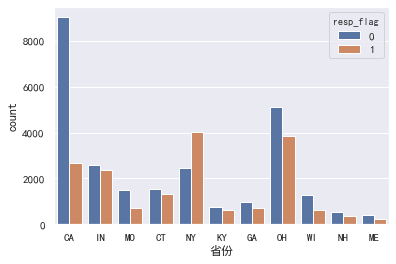

In [47]:
sns.countplot(x='STATE_NAME', hue='resp_flag', data=df)
plt.xlabel('省份')

In [48]:
data6[["贫穷以上人的比例","贫穷以下人的比例"]].corr()

,贫穷以上人的比例,贫穷以下人的比例
贫穷以上人的比例,1.000000,-0.942567
贫穷以下人的比例,-0.942567,1.000000


In [49]:
data6[["所处地区蓝领所占百分比","白领所占比例"]].corr()

,所处地区蓝领所占百分比,白领所占比例
所处地区蓝领所占百分比,1.000000,-0.815744
白领所占比例,-0.815744,1.000000


In [50]:
data6[["所处地区有多少居住小区在2000年及以后建立","所处地区居住年限"]].corr()

,所处地区有多少居住小区在2000年及以后建立,所处地区居住年限
所处地区有多少居住小区在2000年及以后建立,1.000000,-0.113508
所处地区居住年限,-0.113508,1.000000


In [51]:
data_cor6 = data6.corr()>0.65
e = []

for i in data_cor6.columns:
    if data_cor6[i].sum()>1:
        e.append(i)
        
e

['贫穷以上人的比例', '已婚人群所占比例', '有房子人所占比例', '独宅住户所占比例']

In [52]:
def chinese(x):
    y=x.copy()
    y.columns=pd.Series(y.columns).map(dic)
    return y

In [53]:
df.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,...,14,52,65,71.0,22,79.0,15.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,15,44,81,99.0,37,65.0,17.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,17,38,44,62.0,44,47.0,20.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,14,45,71,99.0,39,71.0,4.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,29,32,13,36.0,15,65.0,9.0,37,4,3


In [54]:
df.columns

Index(['KBM_INDV_ID', 'resp_flag', 'GEND', 'CA00', 'CA03', 'CA06', 'CA11',
       'CA16', 'AART', 'ADBT', 'ADEP', 'AHBP', 'AHCH', 'ARES', 'AHRT', 'AASN',
       'ADGS', 'AHRL', 'ASKN', 'AVIS', 'BANK', 'COLLEGE', 'FINI', 'INLI',
       'INMEDI', 'INVE', 'IOLP', 'MOBPLUS', 'N2NCY', 'N1819', 'N2029', 'N3039',
       'N4049', 'N5059', 'N6064', 'N65P', 'ONLA', 'POEP', 'SGFA', 'SGLL',
       'SGOE', 'SGSE', 'SGTC', 'U18', 'LIVEWELL', 'NOC19', 'NAH19', 'NPH19',
       'POC19', 'HOMSTAT', 'HINSUB', 'STATE_NAME', 'age', 'c210apvt',
       'c210b200', 'c210blu', 'c210bpvt', 'c210cip', 'c210ebi', 'c210hmi',
       'c210hva', 'c210kses', 'c210mah', 'c210mob', 'c210mys', 'c210pdv',
       'c210pmr', 'c210poo', 'c210psu', 'c210pwc', 'c210wht', 'ilor', 'pdpe',
       'tins', 'zhip19'],
      dtype='object')

In [55]:
df_1 = chinese(df)

In [56]:
df_1.shape
df_1.columns

(43666, 75)

Index(['Individual ID', '是否response', '性别', '小孩是否在0-2岁之间', '小孩是否在3-5岁之间',
       '小孩是否在6-10岁之间', '小孩是否在11-15岁之间', '小孩是否在16-18岁之间', '是否有关节炎', '是否有糖尿病',
       '是否有抑郁症', '是否有高血压', '胆固醇含量是否过高', '是否有呼吸疾病', '是否有心脏病', '是否有过敏性鼻炎',
       '是否有消化不良', '是否耳聋', '是否有皮肤病', '是否视力不好', '是否有过破产记录', '是否大学毕业', '是否用过保险服务',
       '是否投资过寿险', '是否购买过医疗险', '是否有投资', '是否网上购买过产品', '是否通过快递买过东西', '所处的县的大小',
       '是否有家庭成员在18-19岁之间', '是否有家庭成员在20-29岁之间', '是否有家庭成员在30-39岁之间',
       '是否有家庭成员在40-49岁之间', '是否有家庭成员在50-59岁之间', '是否有家庭成员在60-64岁之间',
       '是否有家庭成员在65岁以上', '是否上网', '家里是否有老人', '是否喜欢美术', '是否经常有奢侈消费', '是否经常户外活动',
       '是否喜欢运动', '是否热爱科技', '是否有家庭成员小于18岁', '幸福指数', '家庭小孩个数', '家庭成年人个数',
       '家庭成员人数量', '是否有小孩', '是否有房子', '是否有医保补贴', '所处的省份', '年龄', '贫穷以上人的比例',
       '所处地区有多少居住小区在2000年及以后建立', '所处地区蓝领所占百分比', '贫穷以下人的比例', '收入所处排名',
       '普查家庭有效购买收入', '家庭收入', '家庭房屋价值', '社会经济地位评分', '家庭自成立日起的时间',
       '所处地区mobile home的比例', '学历', '离婚或者分居人群所占比例', '已婚人群所占比例', '有房子人所占比例',
       '独宅住户所占比例', '有小孩的家庭所占比例', '白领所占比例', '所处地区居住年

## Data Cleaning

### Delete Features

In [57]:
#drop columns
df_1 = df_1.drop(axis=1, labels=['Individual ID','小孩是否在0-2岁之间','小孩是否在3-5岁之间','小孩是否在6-10岁之间','小孩是否在11-15岁之间','小孩是否在16-18岁之间','家里是否有老人','是否有高血压','胆固醇含量是否过高','是否有过敏性鼻炎','是否有消化不良','是否有投资','是否经常户外活动','收入所处排名','普查家庭有效购买收入','家庭房屋价值','贫穷以上人的比例','所处地区mobile home的比例','已婚人群所占比例','有房子人所占比例','独宅住户所占比例','白领所占比例','Individual ID'])
df_1

,是否response,性别,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有呼吸疾病,是否有心脏病,是否耳聋,是否有皮肤病,是否视力不好,...,家庭收入,社会经济地位评分,家庭自成立日起的时间,学历,离婚或者分居人群所占比例,有小孩的家庭所占比例,所处地区居住年限,所在地区处方药计划覆盖的比例,该客户被多少个名单source 包含,zip level的家庭收入排名
0,0,M,N,N,N,N,N,N,N,N,...,90.0,111,64.0,5,14,22,15.0,42,8,8
1,0,M,N,N,N,N,N,N,N,N,...,84.0,97,56.0,4,15,37,17.0,46,6,3
2,0,F,N,N,N,N,N,N,N,N,...,50.0,83,50.0,4,17,44,20.0,46,7,3
3,0,F,N,N,N,N,N,N,N,N,...,103.0,105,52.0,4,14,39,4.0,37,8,9
4,0,F,N,N,N,N,N,N,N,N,...,55.0,89,50.0,4,29,15,9.0,37,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43661,1,F,N,N,N,N,N,N,N,N,...,70.0,83,47.0,4,13,42,3.0,75,8,6
43662,1,F,N,N,N,N,N,N,N,N,...,91.0,96,59.0,4,18,33,1.0,40,4,6
43663,1,M,N,N,N,N,N,N,N,N,...,138.0,134,57.0,6,5,31,25.0,46,5,8
43664,1,M,N,N,N,N,N,N,N,N,...,32.0,68,49.0,4,17,23,17.0,83,6,5


In [58]:
df_1.head()

,是否response,性别,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有呼吸疾病,是否有心脏病,是否耳聋,是否有皮肤病,是否视力不好,...,家庭收入,社会经济地位评分,家庭自成立日起的时间,学历,离婚或者分居人群所占比例,有小孩的家庭所占比例,所处地区居住年限,所在地区处方药计划覆盖的比例,该客户被多少个名单source 包含,zip level的家庭收入排名
0,0,M,N,N,N,N,N,N,N,N,...,90.0,111,64.0,5,14,22,15.0,42,8,8
1,0,M,N,N,N,N,N,N,N,N,...,84.0,97,56.0,4,15,37,17.0,46,6,3
2,0,F,N,N,N,N,N,N,N,N,...,50.0,83,50.0,4,17,44,20.0,46,7,3
3,0,F,N,N,N,N,N,N,N,N,...,103.0,105,52.0,4,14,39,4.0,37,8,9
4,0,F,N,N,N,N,N,N,N,N,...,55.0,89,50.0,4,29,15,9.0,37,4,3


### Drop Duplicated Records

In [59]:
df_1=df_1.drop_duplicates()
df_1.shape

(43666, 53)

In [60]:
df_2 = df_1.copy()

### Fill Missing Values

#### Split Dataset into Training and Testing Sets before Further Cleaning

In [61]:
from sklearn.model_selection import train_test_split

y = df_2.pop('是否response')
x = df_2

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [62]:
fill_col=pd.read_excel("保险案例数据字典填充.xlsx",header=None)

In [63]:
fill_col.columns = ['字段名', '填充方式']
fill_col

,字段名,填充方式
0,年龄,中位数
1,是否有家庭成员在18-19岁之间,众数
2,是否有皮肤病,众数
3,是否大学毕业,众数
4,是否通过快递买过东西,众数
5,所处的县的大小,众数
6,幸福指数,中位数
7,是否有房子,众数
8,是否有医保补贴,众数
9,家庭收入,中位数


In [64]:
xtrain_01=xtrain.copy()
xtest_01=xtest.copy()

mod=xtrain_01[fill_col["字段名"][fill_col["填充方式"]=="众数"]].mode()
mod

,是否有家庭成员在18-19岁之间,是否有皮肤病,是否大学毕业,是否通过快递买过东西,所处的县的大小,是否有房子,是否有医保补贴
0,N,N,N,M,A,Y,U


In [65]:
dic=dict(zip(mod.columns,mod.iloc[0,:]))

xtrain_01=xtrain.fillna(value=dic)

#### Fill in Modes

In [66]:
mod_test=xtest_01[fill_col["字段名"][fill_col["填充方式"]=="众数"]].mode()

dic_test=dict(zip(mod_test.columns,mod_test.iloc[0,:]))

xtest_01=xtest.fillna(value=dic_test)

#### Fill in Medians

In [67]:
median=xtrain_01[fill_col["字段名"][fill_col["填充方式"]=="中位数"]].median()
dic=dict(zip(median.index,median))
xtrain_01=xtrain_01.fillna(value=dic)
xtrain_01.isnull().sum()[xtrain_01.isnull().sum()!=0]

median_test=xtest_01[fill_col["字段名"][fill_col["填充方式"]=="中位数"]].median()
dic_test1=dict(zip(median_test.index,median_test))
xtest_01=xtest_01.fillna(value=dic)
xtest_01.isnull().sum()[xtest_01.isnull().sum()!=0]

Series([], dtype: int64)

Series([], dtype: int64)

#### Using Replacement for Special Feature

In [68]:
xtrain_01["是否有家庭成员在60-64岁之间"] = xtrain_01["是否有家庭成员在60-64岁之间"].replace('0','N')

xtest_01["是否有家庭成员在60-64岁之间"] = xtest_01["是否有家庭成员在60-64岁之间"].replace('0','N')

### Encode Features

In [69]:
encode_col=pd.read_excel("保险案例数据字典填充2.xlsx",header=None)

encode_col.columns = ['字段名', '转码方式']
encode_col

,字段名,转码方式
0,变量说明,转
1,性别,0-1
2,学历,哑变量
3,是否有小孩,哑变量
4,是否有家庭成员小于18岁,0-1
5,是否有家庭成员在18-19岁之间,0-1
6,是否有家庭成员在20-29岁之间,0-1
7,是否有家庭成员在30-39岁之间,0-1
8,是否有家庭成员在40-49岁之间,0-1
9,是否有家庭成员在50-59岁之间,0-1


In [70]:
xtrain_02=xtrain_01.copy()
xtest_02=xtest_01.copy()

#### Encode into 0/1

In [71]:
z_to_o=encode_col[encode_col["转码方式"]=='0-1'].字段名
z_to_o

1                   性别
4         是否有家庭成员小于18岁
5     是否有家庭成员在18-19岁之间
6     是否有家庭成员在20-29岁之间
7     是否有家庭成员在30-39岁之间
8     是否有家庭成员在40-49岁之间
9     是否有家庭成员在50-59岁之间
10    是否有家庭成员在60-64岁之间
11       是否有家庭成员在65岁以上
12              是否有关节炎
13              是否有糖尿病
14              是否有抑郁症
15             是否有呼吸疾病
16              是否有心脏病
17                是否耳聋
18              是否有皮肤病
19              是否视力不好
20            是否有过破产记录
21              是否大学毕业
22            是否用过保险服务
23             是否投资过寿险
24            是否购买过医疗险
25           是否网上购买过产品
28                是否上网
29              是否喜欢美术
30           是否经常有奢侈消费
31              是否喜欢运动
32              是否热爱科技
Name: 字段名, dtype: object

In [72]:
xtrain_02[z_to_o].head()

,性别,是否有家庭成员小于18岁,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,是否有关节炎,...,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否网上购买过产品,是否上网,是否喜欢美术,是否经常有奢侈消费,是否喜欢运动,是否热爱科技
18001,M,N,N,N,Y,Y,N,N,Y,N,...,N,N,N,N,N,Y,N,N,N,N
22763,F,N,N,N,N,N,N,Y,Y,N,...,N,N,N,N,Y,Y,Y,N,Y,Y
40488,F,N,N,N,N,N,Y,N,Y,Y,...,N,N,Y,Y,Y,Y,Y,Y,Y,Y
22585,F,N,N,N,N,N,N,N,Y,N,...,N,N,N,N,N,Y,N,N,N,N
12204,M,N,N,N,Y,N,Y,N,Y,N,...,Y,N,N,N,N,Y,N,Y,Y,Y


In [73]:
fre(xtrain_02[z_to_o])
# Discover that '是否有家庭成员小于18岁' feature has only one value, thus delete.

字段名: 性别
---------
字段数据类型: object
---------------------------
F    17768
M    12798
Name: 性别, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有家庭成员小于18岁
---------
字段数据类型: object
---------------------------
N    30566
Name: 是否有家庭成员小于18岁, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有家庭成员在18-19岁之间
---------
字段数据类型: object
---------------------------
N    30515
Y       51
Name: 是否有家庭成员在18-19岁之间, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有家庭成员在20-29岁之间
---------
字段数据类型: object
---------------------------
N    28934
Y     1632
Name: 是否有家庭成员在20-29岁之间, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 是否有家庭成员在30-39岁之间
---------
字段数据类型: object
---------------------------
N    25619
Y     494

In [74]:
# delete '性别' column
xtrain_02.pop('是否有家庭成员小于18岁')
xtest_02.pop('是否有家庭成员小于18岁')

18001    N
22763    N
40488    N
22585    N
12204    N
        ..
16304    N
79       N
12119    N
14147    N
38408    N
Name: 是否有家庭成员小于18岁, Length: 30566, dtype: object

20753    N
20558    N
22118    N
581      N
16829    N
        ..
424      N
8763     N
6964     N
349      N
7895     N
Name: 是否有家庭成员小于18岁, Length: 13100, dtype: object

In [75]:
z_to_o=z_to_o.tolist()
z_to_o.remove('是否有家庭成员小于18岁')

In [76]:
xtrain_02[z_to_o].head()

,性别,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,是否有关节炎,是否有糖尿病,...,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否网上购买过产品,是否上网,是否喜欢美术,是否经常有奢侈消费,是否喜欢运动,是否热爱科技
18001,M,N,N,Y,Y,N,N,Y,N,N,...,N,N,N,N,N,Y,N,N,N,N
22763,F,N,N,N,N,N,Y,Y,N,N,...,N,N,N,N,Y,Y,Y,N,Y,Y
40488,F,N,N,N,N,Y,N,Y,Y,N,...,N,N,Y,Y,Y,Y,Y,Y,Y,Y
22585,F,N,N,N,N,N,N,Y,N,N,...,N,N,N,N,N,Y,N,N,N,N
12204,M,N,N,Y,N,Y,N,Y,N,N,...,Y,N,N,N,N,Y,N,Y,Y,Y


In [77]:
from sklearn.preprocessing import OrdinalEncoder

new_arr=OrdinalEncoder().fit_transform(xtrain_02[z_to_o])
new_arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

In [78]:
xtrain_03 = pd.DataFrame(data=new_arr,columns=xtrain_02[z_to_o].columns,index=xtrain_02[z_to_o].index)
xtrain_03.head()

,性别,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,是否有关节炎,是否有糖尿病,...,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否网上购买过产品,是否上网,是否喜欢美术,是否经常有奢侈消费,是否喜欢运动,是否热爱科技
18001,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
40488,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12204,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [79]:
xtrain_02=pd.concat([xtrain_02.drop(columns=xtrain_03.columns),xtrain_03],axis=1)

#### Encode into Dummy Variables

In [80]:
xtrain_02.head()

,是否通过快递买过东西,所处的县的大小,幸福指数,家庭小孩个数,家庭成年人个数,家庭成员人数量,是否有小孩,是否有房子,是否有医保补贴,所处的省份,...,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否网上购买过产品,是否上网,是否喜欢美术,是否经常有奢侈消费,是否喜欢运动,是否热爱科技
18001,M,A,4.0,0,4,4,P,Y,U,OH,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22763,M,B,4.0,0,2,2,P,R,A,IN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
40488,M,A,1.0,0,2,2,P,Y,U,NH,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22585,M,C,2.0,0,1,1,U,Y,A,ME,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12204,M,B,1.0,1,4,5,Y,Y,U,KY,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [81]:
from sklearn.preprocessing import OrdinalEncoder

new_arr1=OrdinalEncoder().fit_transform(xtest_02[z_to_o])

xtest_03=pd.DataFrame(data=new_arr1,columns=xtest_02[z_to_o].columns,index=xtest_02[z_to_o].index)

xtest_02=pd.concat([xtest_02.drop(columns=xtest_03.columns),xtest_03],axis=1)

xtest_02.head()

,是否通过快递买过东西,所处的县的大小,幸福指数,家庭小孩个数,家庭成年人个数,家庭成员人数量,是否有小孩,是否有房子,是否有医保补贴,所处的省份,...,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否网上购买过产品,是否上网,是否喜欢美术,是否经常有奢侈消费,是否喜欢运动,是否热爱科技
20753,U,A,4.0,0,1,1,U,Y,C,NY,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20558,M,A,1.0,3,3,6,Y,Y,U,NY,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22118,M,C,3.0,0,2,2,U,Y,B,IN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,M,A,4.0,0,1,1,U,Y,U,CA,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
16829,M,B,1.0,0,2,2,U,Y,U,OH,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
fre(xtest_02)

字段名: 是否通过快递买过东西
---------
字段数据类型: object
---------------------------
M    8332
S    2950
U    1154
P     664
Name: 是否通过快递买过东西, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 所处的县的大小
---------
字段数据类型: object
---------------------------
A    7958
B    3829
C    1142
D     171
Name: 所处的县的大小, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 幸福指数
---------
字段数据类型: float64
---------------------------
4.0    4895
3.0    3628
1.0    2620
2.0    1842
6.0     115
Name: 幸福指数, dtype: int64
---------------------------
缺失值个数: 0
----------------------------------------------------------------


字段名: 家庭小孩个数
---------
字段数据类型: int64
---------------------------
0    9918
1    1568
2     714
3     428
4     312
5      95
6      43
7      11
8       9
9       2
Name: 家庭小孩个数, dtype: int64
---------------------------
缺失值个数: 0
-------------------------------------

In [83]:
dummy = encode_col[encode_col['转码方式']=='哑变量'].字段名
dummy

2             学历
3          是否有小孩
26    是否通过快递买过东西
27       所处的县的大小
33         是否有房子
34       是否有医保补贴
35         所处的省份
Name: 字段名, dtype: object

In [84]:
xtrain_02[dummy]

,学历,是否有小孩,是否通过快递买过东西,所处的县的大小,是否有房子,是否有医保补贴,所处的省份
18001,4,P,M,A,Y,U,OH
22763,4,P,M,B,R,A,IN
40488,4,P,M,A,Y,U,NH
22585,3,U,M,C,Y,A,ME
12204,6,Y,M,B,Y,U,KY
...,...,...,...,...,...,...,...
16304,4,P,M,B,Y,B,OH
79,4,P,M,A,Y,U,CA
12119,3,U,P,B,Y,C,KY
14147,6,U,M,B,Y,U,IN


In [85]:
from sklearn.preprocessing import OneHotEncoder

xtrain_04 = xtrain_02.copy()
xtest_04 = xtest_02.copy()

new_arr2=OneHotEncoder().fit_transform(xtrain_04[dummy]).toarray()
new_arr2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [86]:
xtrain_05=pd.concat([xtrain_04.drop(columns=dummy),pd.DataFrame(new_arr2,index=xtrain_04.index)],axis=1)
xtrain_05.head()

,幸福指数,家庭小孩个数,家庭成年人个数,家庭成员人数量,年龄,所处地区有多少居住小区在2000年及以后建立,所处地区蓝领所占百分比,贫穷以下人的比例,家庭收入,社会经济地位评分,...,30,31,32,33,34,35,36,37,38,39
18001,4.0,0,4,4,69.0,7.0,18,3,86.0,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22763,4.0,0,2,2,66.0,69.0,25,12,67.0,83,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40488,1.0,0,2,2,71.0,7.0,29,11,73.0,87,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22585,2.0,0,1,1,77.0,3.0,13,20,24.0,68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12204,1.0,1,4,5,77.0,16.0,8,1,93.0,105,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
new_arr3=OneHotEncoder().fit_transform(xtest_04[dummy]).toarray()
new_arr3

xtest_05=pd.concat([xtest_04.drop(columns=dummy),pd.DataFrame(new_arr3,index=xtest_04.index)],axis=1)
xtest_05.head()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

,幸福指数,家庭小孩个数,家庭成年人个数,家庭成员人数量,年龄,所处地区有多少居住小区在2000年及以后建立,所处地区蓝领所占百分比,贫穷以下人的比例,家庭收入,社会经济地位评分,...,30,31,32,33,34,35,36,37,38,39
20753,4.0,0,1,1,79.0,18.0,19,11,43.0,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20558,1.0,3,3,6,73.0,7.0,3,2,175.0,158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22118,3.0,0,2,2,66.0,6.0,35,12,54.0,74,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,4.0,0,1,1,72.0,11.0,11,5,70.0,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16829,1.0,0,2,2,78.0,65.0,11,8,60.0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
xtrain_05.shape
xtest_05.shape

(30566, 84)

(13100, 84)

## Modeling

### Cross_Validation_Score

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf=DecisionTreeClassifier(random_state=100,class_weight="balanced")
cvs=cross_val_score(clf,xtrain_05,ytrain)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [90]:
cvs.mean()

0.5936988470582345

### Applying Grid-Search for Best Model Performance

In [91]:
from  sklearn.model_selection import GridSearchCV
param_test = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,'max_depth':range(3,15)
#               ,'min_samples_leaf':(1,50,5)
 #              ,'min_impurity_decrease':np.linspace(0,0.5,20)
             }

gsearch=GridSearchCV(estimator=clf,
                    param_grid=param_test,
                    scoring='roc_auc',
                    n_jobs=-1,
                    cv=5,
                    iid=False,
                    verbose=2)

gsearch.fit(xtrain_05,ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   18.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(3, 15),
                       

In [94]:
gsearch.best_score_
gsearch.best_params_
gsearch.score(xtrain_05,ytrain)
gsearch.score(xtest_05,ytest)

0.6899093242339523

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

0.7050708138994148

0.6893541735204457

### Model Evaluation

In [95]:
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [96]:
y_pre=gsearch.predict(xtest_05)

#### Accuracy, Precision, Recall

In [97]:
accuracy_score(y_pre,ytest)
precision_score(y_pre,ytest)
recall_score(y_pre,ytest)
fpr,tpr,thresholds=roc_curve(y_pre,ytest)

0.6053435114503817

0.7551639188933106

0.5068040188223324

#### ROC Curve

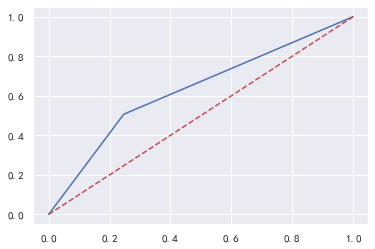

In [98]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,c="b",label='ROC曲线')
plt.plot(fpr,fpr,c='r',ls='--')

### Decision Tree (Visualization)

In [101]:
{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

from  sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
clf=DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best')
clf=clf.fit(xtrain_05,ytrain)

xtrain_05.columns

features=xtrain_05.columns
dot_data=tree.export_graphviz(clf,
                             feature_names=features,
                             class_names=['Not Buy','Buy'],
                             filled=True,
                             rounded=True,
                              leaves_parallel=False)

graph=graphviz.Source(dot_data)

graph.render('tree')

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

Index([                  '幸福指数',                 '家庭小孩个数',
                      '家庭成年人个数',                '家庭成员人数量',
                           '年龄', '所处地区有多少居住小区在2000年及以后建立',
                  '所处地区蓝领所占百分比',               '贫穷以下人的比例',
                         '家庭收入',               '社会经济地位评分',
                   '家庭自成立日起的时间',           '离婚或者分居人群所占比例',
                   '有小孩的家庭所占比例',               '所处地区居住年限',
               '所在地区处方药计划覆盖的比例',     '该客户被多少个名单source 包含',
             'zip level的家庭收入排名',                     '性别',
             '是否有家庭成员在18-19岁之间',       '是否有家庭成员在20-29岁之间',
             '是否有家庭成员在30-39岁之间',       '是否有家庭成员在40-49岁之间',
             '是否有家庭成员在50-59岁之间',       '是否有家庭成员在60-64岁之间',
                '是否有家庭成员在65岁以上',                 '是否有关节炎',
                       '是否有糖尿病',                 '是否有抑郁症',
                      '是否有呼吸疾病',                 '是否有心脏病',
                         '是否耳聋',                 '是否有皮肤病',
                       '是否视力不好',               '是否有过破产记录

'tree.pdf'

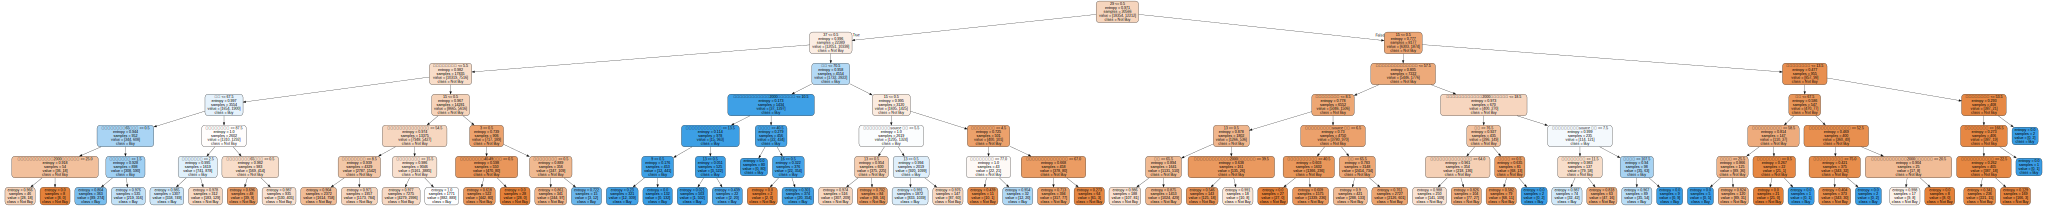

In [102]:
graph